In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %pip install xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df= pd.read_csv("train.csv")

In [4]:
df_test=pd.read_csv("test.csv")

In [5]:
df.head()


df.info()



df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [6]:
df.isnull()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,False,False,False,False,False,False,False,False,False,False,False,False,False
2186,False,False,False,False,False,False,False,False,False,False,False,False,False
2187,False,False,False,False,False,False,False,False,False,False,False,False,False
2188,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(df.isnull().sum()) 

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
print(df.isnull().sum()) 

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [10]:
df.shape

(2190, 13)

In [11]:
df_filter=df[df['rainfall']== 0]
df_filter

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0
17,17,18,1034.6,17.5,16.2,14.1,11.8,68.0,60.0,2.5,50.0,13.4,0
21,21,22,1022.6,21.9,17.8,15.8,14.3,52.0,49.0,9.1,50.0,10.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2169,345,1016.3,16.3,16.5,15.8,16.6,91.0,83.0,0.3,50.0,29.8,0
2174,2174,350,1020.8,20.1,16.8,14.8,8.8,70.0,78.0,6.6,50.0,14.7,0
2175,2175,351,1017.0,20.9,18.8,17.8,15.0,79.0,83.0,1.6,50.0,20.0,0
2177,2177,353,1017.6,19.9,18.8,17.6,16.7,86.0,82.0,0.0,70.0,18.6,0


In [12]:
df_filter_1=df[df['rainfall']== 1]
df_filter_1

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [13]:
df_copy = df.drop(columns=["id", "day"]). copy()

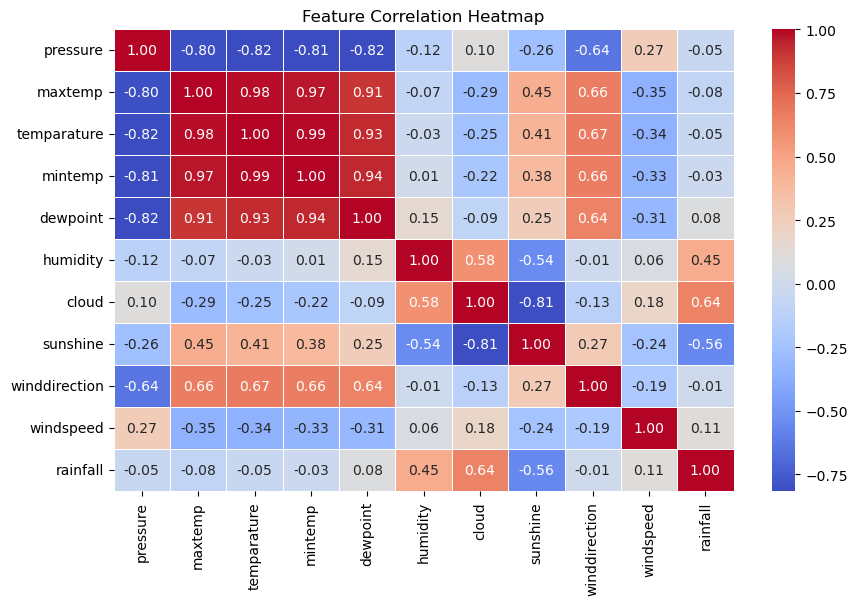

In [14]:
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation values range from -1 to +1:

+1 → Strong positive correlation (both increase together)

0 → No correlation

-1 → Strong negative correlation (one increases, the other decreases)

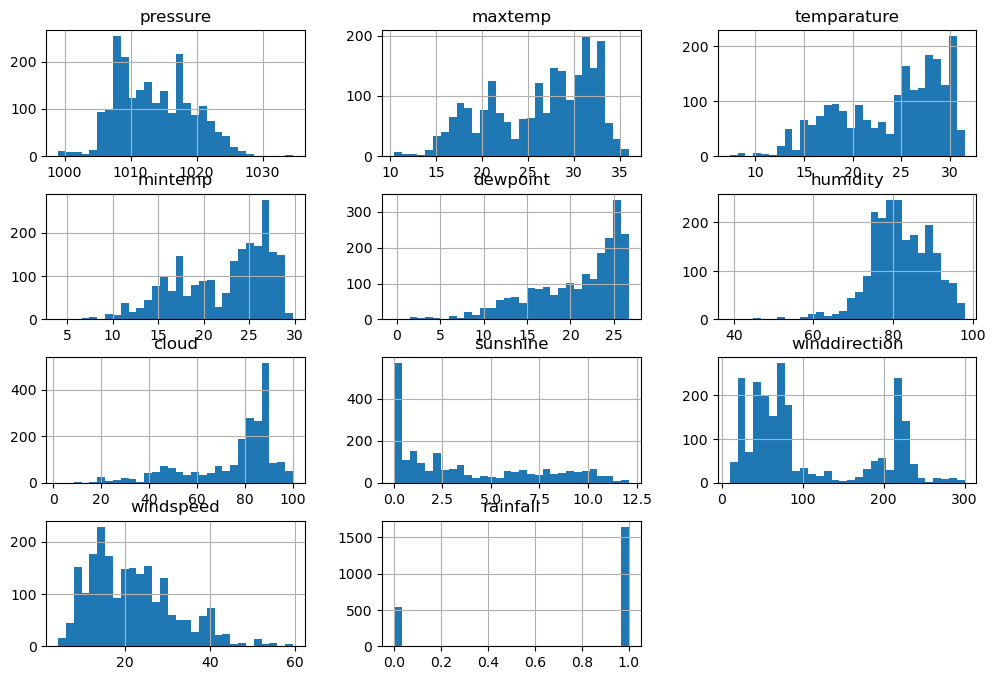

In [16]:
df_copy.hist(figsize=(12, 8), bins=30)
plt.show()

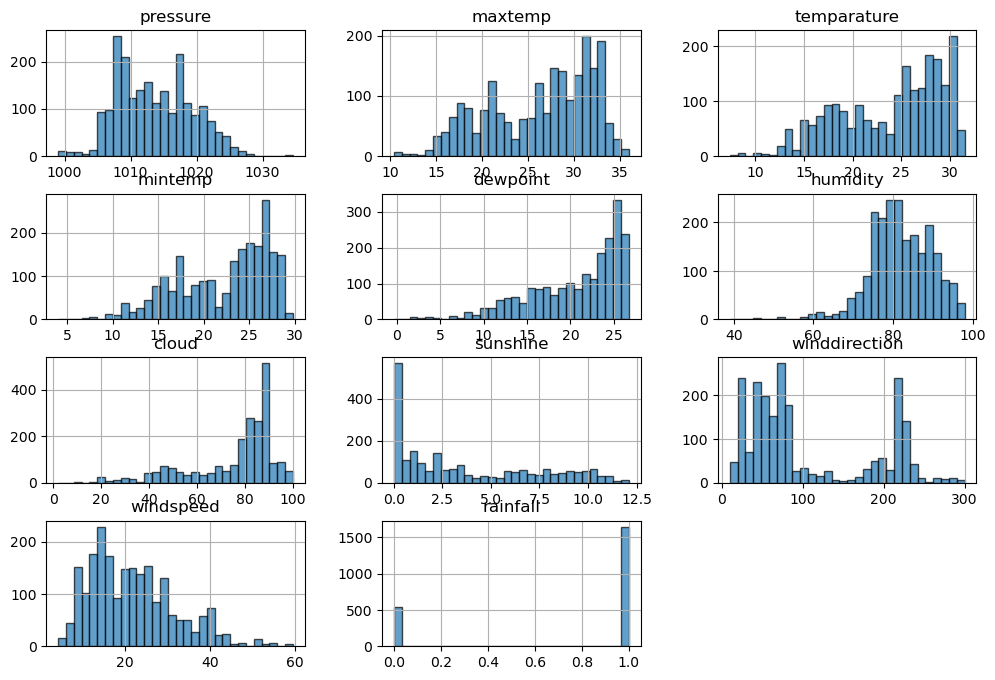

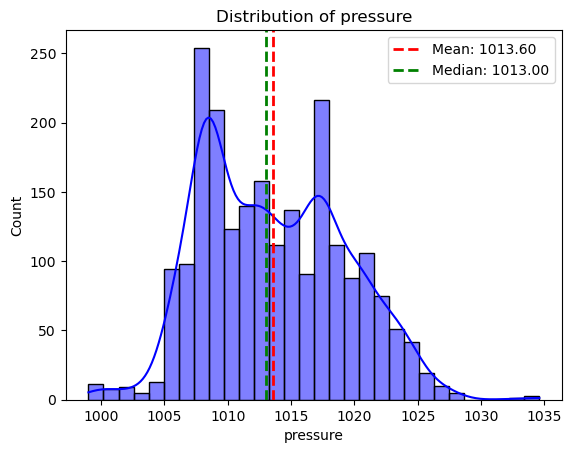

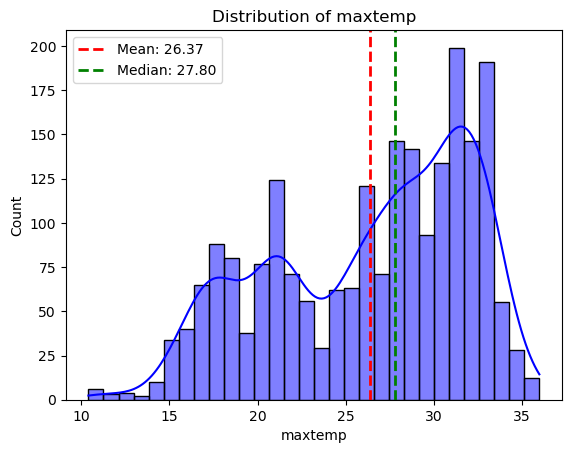

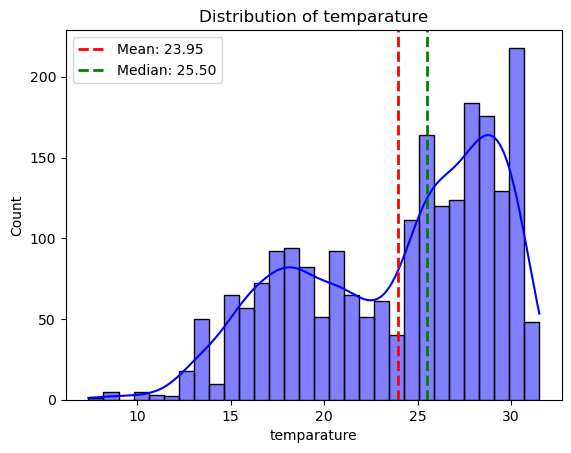

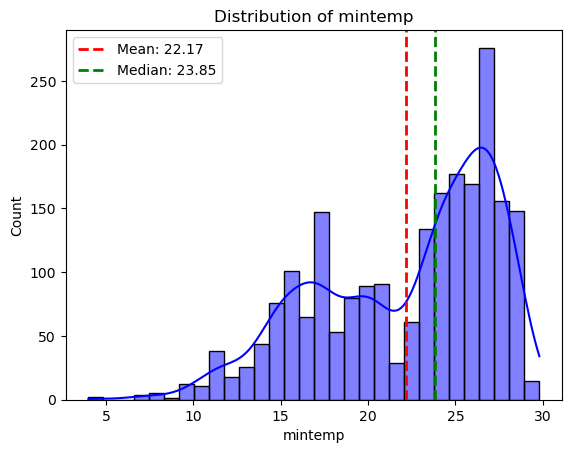

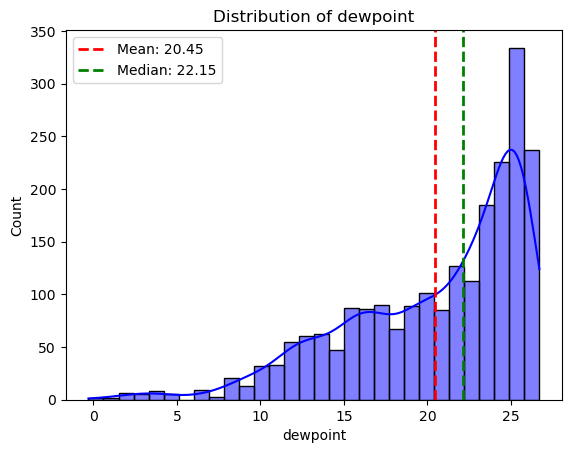

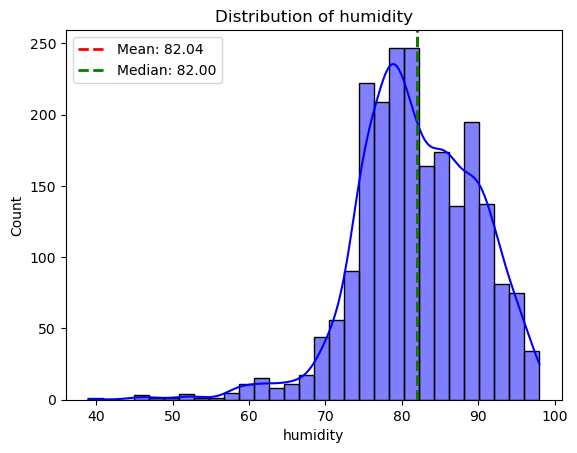

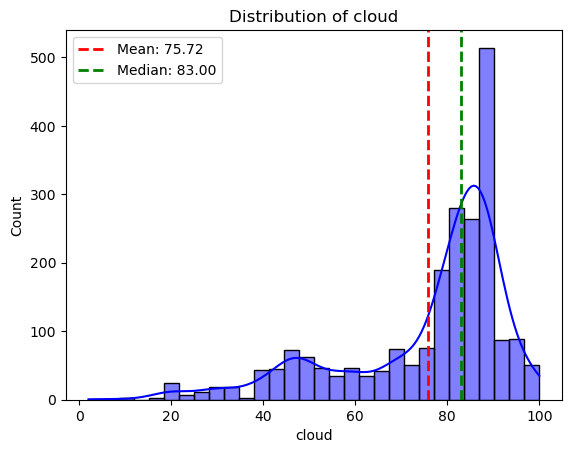

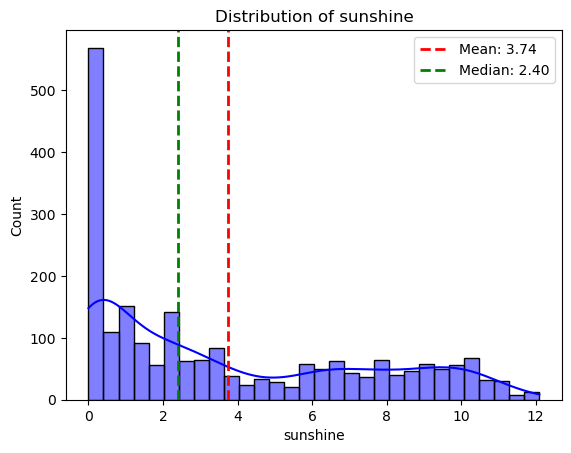

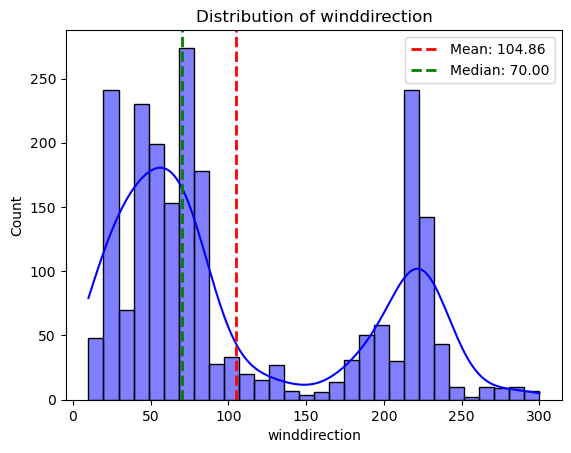

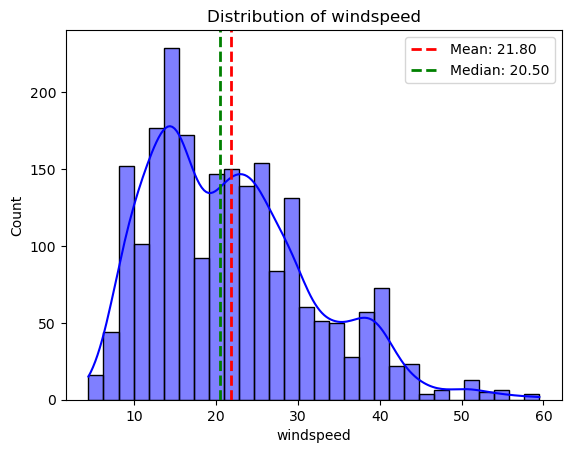

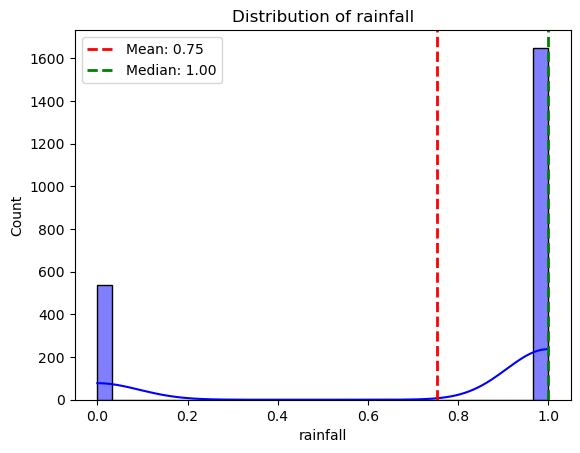

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
df_copy.hist(figsize=(12, 8), bins=30, edgecolor="black", alpha=0.7)

# Add mean & median lines
for col in df_copy.select_dtypes(include=["float64", "int64"]).columns:
    plt.figure()
    sns.histplot(df_copy[col], bins=30, kde=True, color="blue")
    
    # Mean and Median
    mean_val = df_copy[col].mean()
    median_val = df_copy[col].median()
    
    plt.axvline(mean_val, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color="green", linestyle="dashed", linewidth=2, label=f"Median: {median_val:.2f}")
    
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


Right-skewed (Positive Skew) → Mean > Median (red line is to the right).

Left-skewed (Negative Skew) → Mean < Median (red line is to the left).

Normal Distribution → Mean ≈ Median (lines overlap). 

In [19]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [20]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [21]:
df_test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [22]:
df_test.head()
df_test["winddirection"]=df_test["winddirection"].fillna(df_test["winddirection"].mean())

In [23]:
df_test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [24]:
X = df.drop(columns=["id", "rainfall"])  # Features
y = df["rainfall"]  # Target variable

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Standardize features (useful for Logistic Regression)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test.drop(columns=["id"]))

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")


XGBoost Accuracy: 0.8425


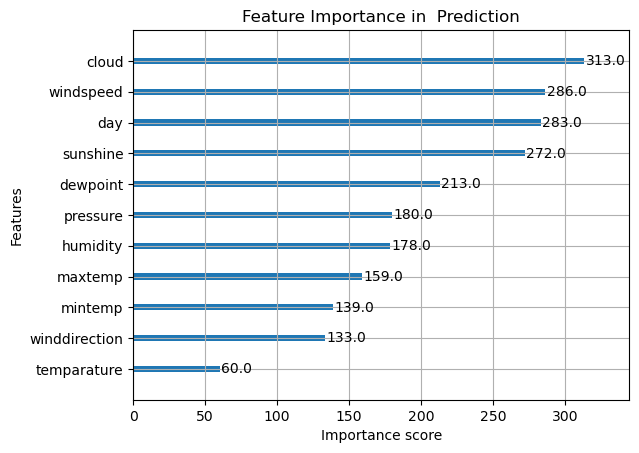

In [56]:
xgb.plot_importance(xgb_model)
plt.title("Feature Importance in  Prediction")
plt.show()